## Machine Learning

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.

In [49]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deep keras/data/HR_comma_sep.csv')

In [50]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [52]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [53]:
df['left'].value_counts()

,count
left,
0,11428
1,3571


<Axes: ylabel='Frequency'>

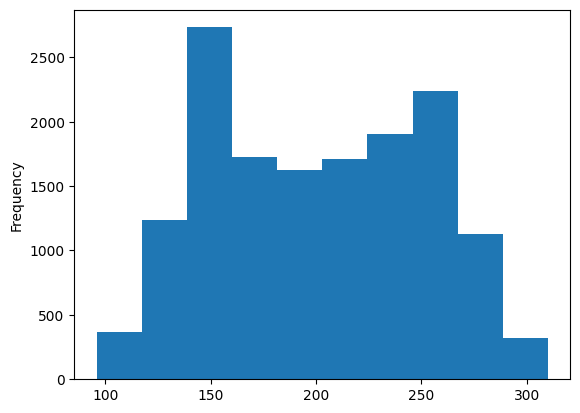

In [54]:
# Check if any feature needs rescaling.
# You may plot a histogram of the feature to decide which rescaling method is more appropriate.
df['average_montly_hours'].plot(kind='hist')

In [55]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

<Axes: ylabel='Frequency'>

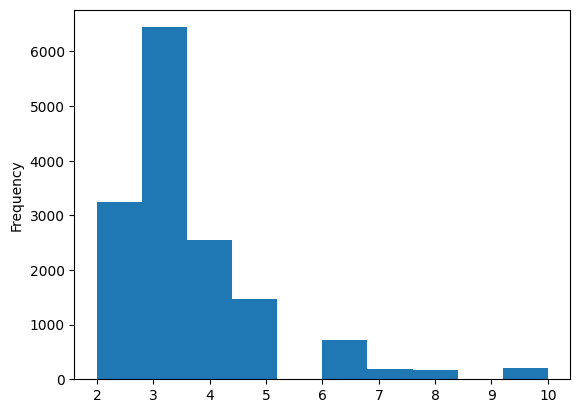

In [56]:
df['time_spend_company'].plot(kind='hist')

In [57]:
df['time_spend_company_100'] = df['time_spend_company']/100.0

In [58]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_montly_hours_100,time_spend_company_100
0,0.38,0.53,2,157,3,0,1,0,sales,low,1.57,0.03
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2.62,0.06
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2.72,0.04
3,0.72,0.87,5,223,5,0,1,0,sales,low,2.23,0.05
4,0.37,0.52,2,159,3,0,1,0,sales,low,1.59,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1.51,0.03
14995,0.37,0.48,2,160,3,0,1,0,support,low,1.60,0.03
14996,0.37,0.53,2,143,3,0,1,0,support,low,1.43,0.03
14997,0.11,0.96,6,280,4,0,1,0,support,low,2.80,0.04


In [59]:
# convert the categorical features into binary dummy columns.
# You will then have to combine them with
# the numerical features using `pd.concat`.

In [60]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100',
       'time_spend_company_100'],
      dtype='object')

In [61]:
df[['sales', 'salary']]

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [62]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [63]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False


In [64]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100',
       'time_spend_company_100'],
      dtype='object')

In [65]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours_100' , 'time_spend_company_100', 'Work_accident',
               'promotion_last_5years']],
               df_dummies], axis=1).values
y = df['left'].values

In [66]:
X.shape

(14999, 20)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# do the usual train/test split with a 20% test size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [70]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# If X_train and y_train are pandas DataFrames or Series
X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')  # or 'int' for classification


In [72]:
model.fit(X_train, y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7579 - loss: 0.5544


In [73]:
X_test = X_test.astype('float32')

In [74]:
# y_test_pred = model.predict_classes(X_test)
y_test_pred = model.predict(X_test) >0.5

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [75]:
# واقعی
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
# پیش بینی شده
y_test_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[1876,  380],
       [ 358,  386]])

In [78]:
# !pip install keras
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import KFold, cross_val_score


# def build_logistic_regression_model():
#     model = Sequential()
#     model.add(Dense(1, input_dim=20, activation='sigmoid'))
#     model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=10, verbose=0)



# cv = KFold(5, shuffle=True)
# scores = cross_val_score(model, X, y, cv=cv)
# scores
# print("The cross validation accuracy is: {:}  ".format(scores.mean()))